87 x 5400mm board(s) needed

1: Cuts = [4880.0, 513.5], Offcut = 6.5
2: Cuts = [4880.0, 497.5], Offcut = 22.5
3: Cuts = [4880.0, 497.5], Offcut = 22.5
4: Cuts = [4880.0, 410.51], Offcut = 109.48999999999978
5: Cuts = [4880.0, 410.51], Offcut = 109.48999999999978
6: Cuts = [4880.0, 347.5, 170.0], Offcut = 2.5
7: Cuts = [4880.0, 347.5, 170.0], Offcut = 2.5
8: Cuts = [4880.0, 229.5, 182.0], Offcut = 108.5
9: Cuts = [4880.0, 170.0, 170.0, 170.0], Offcut = 10.0
10: Cuts = [4880.0, 170.0, 170.0, 170.0], Offcut = 10.0
11: Cuts = [4880.0, 170.0, 170.0, 170.0], Offcut = 10.0
12: Cuts = [4880.0, 170.0, 170.0, 170.0], Offcut = 10.0
13: Cuts = [4880.0, 170.0, 170.0, 170.0], Offcut = 10.0
14: Cuts = [4880.0, 170.0, 167.42, 167.42], Offcut = 15.159999999999854
15: Cuts = [2671.15, 2671.15], Offcut = 57.69999999999982
16: Cuts = [2535.01, 2535.01, 167.42], Offcut = 162.5599999999995
17: Cuts = [2535.01, 2535.01, 167.42], Offcut = 162.5599999999995
18: Cuts = [2535.01, 2535.01], Offcut = 329.979999999

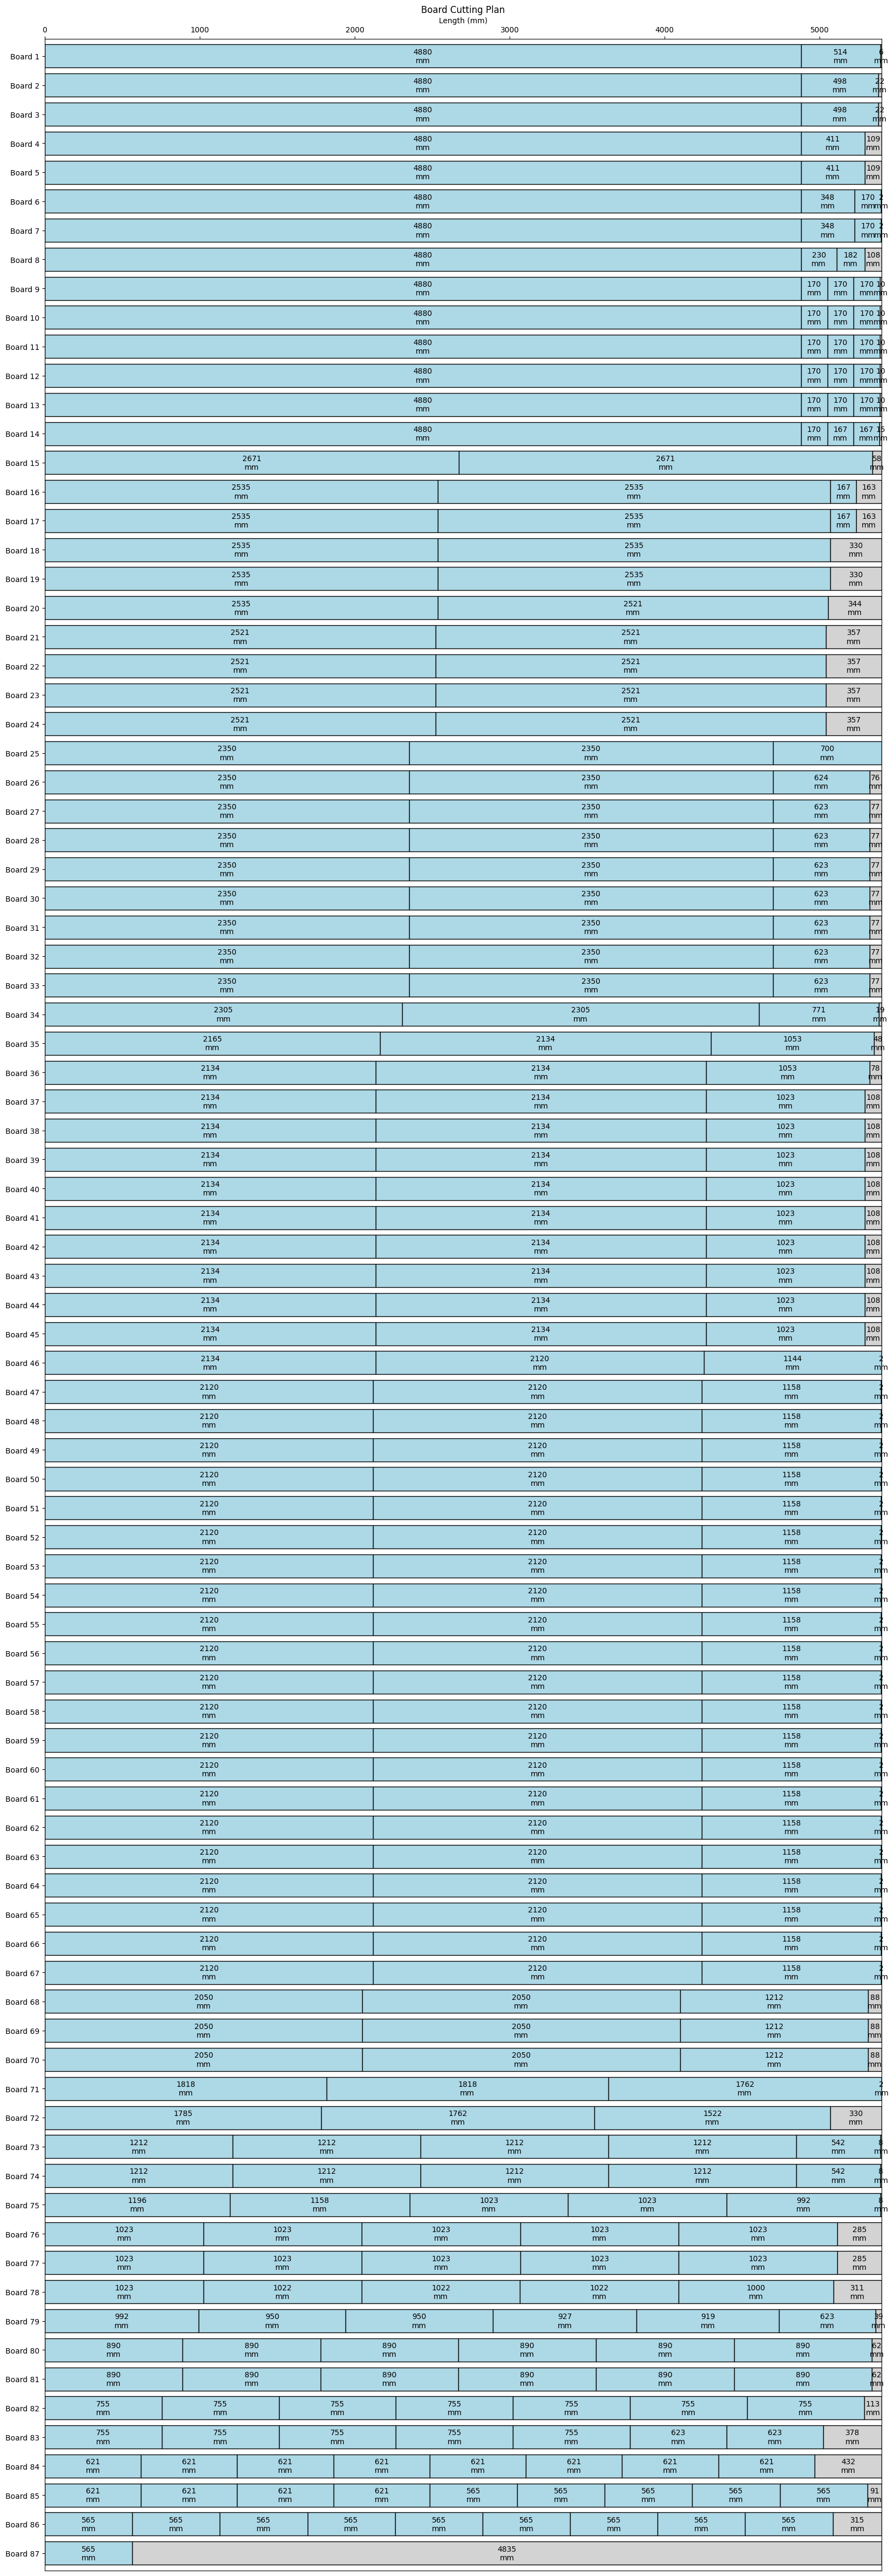

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

components = pd.read_csv("components.csv")

# Finds the best way to split up full-length boards using decreasing-first-fit.
def plan_board_cuts(needed_boards_lengths, raw_board_length, cut_width):
    needed_boards_lengths = sorted(needed_boards_lengths + cut_width, reverse=True)

    bins = []
    for item in needed_boards_lengths:
        placed = False
        for i in range(len(bins)):
            if sum(bins[i]) + item <= raw_board_length:
                bins[i].append(item)
                placed = True
                break
        if not placed:
            bins.append([item])

    print(f"{len(bins)} x {raw_board_length}mm board(s) needed\n")
    for i, contents in enumerate(bins):
        print(f"{i + 1}: Cuts = {contents}, Offcut = {raw_board_length - sum(contents)}")

    return bins

# Visualize the board cuts using matplotlib.
def visualize_board_cuts(cutting_plan, raw_board_length, cut_width):
    fig, ax = plt.subplots(figsize=(20, len(cutting_plan) * 0.7))
    for i, cuts in enumerate(cutting_plan):
        current_length = 0
        y_pos = len(cutting_plan) - i - 1.4
        for cut in cuts:
            # Draw the rectangle representing the cut.
            ax.add_patch(plt.Rectangle((current_length, y_pos), cut - cut_width, 0.8, edgecolor='black', facecolor='lightblue'))
            # Add text label for the cut length.
            ax.text(current_length + (cut - cut_width) / 2, y_pos + 0.4, f"{cut:.0f}\nmm", va='center', ha='center', fontsize=10)
            current_length += cut

        # Draw offcut if any.
        offcut = raw_board_length - sum(cuts)
        if offcut > 0:
            ax.add_patch(plt.Rectangle((current_length, y_pos), offcut, 0.8, edgecolor='black', facecolor='lightgray'))
            ax.text(current_length + offcut / 2, y_pos + 0.4, f"{offcut:.0f}\nmm", va='center', ha='center', fontsize=10)

    ax.set_xlim(0, raw_board_length)
    ax.set_ylim(-0.6, len(cutting_plan)-0.4)
    ax.set_xlabel("Length (mm)")
    ax.set_yticks(range(len(cutting_plan)))
    ax.set_yticklabels([f"Board {len(cutting_plan)-i}" for i in range(len(cutting_plan))])
    ax.set_title("Board Cutting Plan")
    ax.grid(False)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    plt.show()

# Example usage
raw_board_length = 5400
cut_width = 0

board_data = components.query("category == 'board'")[['length', 'count']]
needed_boards_lengths = np.repeat(board_data['length'], board_data['count']).to_numpy()

# Plan the cuts and get the cutting plan
cutting_plan = plan_board_cuts(needed_boards_lengths, raw_board_length, cut_width)

# Visualize the cutting plan
visualize_board_cuts(cutting_plan, raw_board_length, cut_width)